In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r"C:\Users\Anjelito\Documents\WORK\analysis - spotify\SpotifyFeatures.csv"
tracks = pd.read_csv(path)
tracks.head(3)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.0,C#,0.346,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.0,F#,0.151,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.0,C,0.103,-13.879,Minor,0.0362,99.488,5/4,0.368


In [3]:
pd.isnull(tracks).sum().sum()

0

In [4]:
tracks.drop_duplicates(subset = ["artist_name", "track_name"], inplace = True)

### 10 most productive artists

In [5]:
artists_with_most_songs = tracks.groupby('artist_name').size().sort_values(ascending= False).head(10)
artists_with_most_songs = artists_with_most_songs.sort_values()

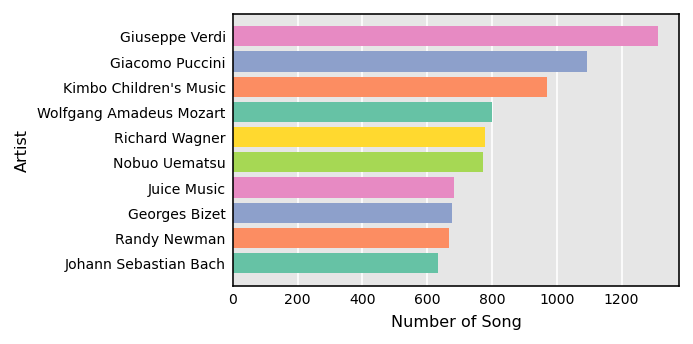

In [6]:
fig, ax = plt.subplots(figsize=(4, 2.5), dpi=144)
colors = plt.cm.Set2(range(6))
y = artists_with_most_songs.index
width = artists_with_most_songs.values
ax.barh(y=y, width=width, color=colors)
ax.tick_params(labelsize=7, length=0)
ax.grid(True, axis='x', color='white')
ax.set_axisbelow(True)
ax.set_facecolor('.9')
ax.set_xlabel("Number of Song", size = 8)
ax.set_ylabel("Artist", size = 8)
plt.show()

### 10 most popular tracks

In [7]:
most_popular_tracks = tracks.sort_values("popularity", ascending = False).head(10)[["artist_name", "track_name"]]
most_popular_tracks["artist_name"] = most_popular_tracks["artist_name"].str.title()
most_popular_tracks["track_name"] = most_popular_tracks["track_name"].str.title()
most_popular_tracks.rename({"artist_name" : "Artist", "track_name" : "Title"}, axis = "columns", inplace= True)
most_popular_tracks.reset_index(drop =True, inplace= True)
most_popular_tracks

,Artist,Title
0,Ariana Grande,7 Rings
1,Post Malone,Wow.
2,Ariana Grande,"Break Up With Your Girlfriend, I'M Bored"
3,Daddy Yankee,Con Calma
4,Marshmello,Happier
5,Halsey,Without Me
6,Ava Max,Sweet But Psycho
7,Post Malone,Sunflower - Spider-Man: Into The Spider-Verse
8,Pedro Capó,Calma - Remix
9,Sam Smith,Dancing With A Stranger (With Normani)


### 100 most popular artists per song average (having min. 10 song)

In [8]:
no_of_song = tracks.groupby("artist_name").size().reset_index(name='no_of_song')
no_of_song.head()

,artist_name,no_of_song
0,!!!,34
1,"""Weird Al"" Yankovic",59
2,$NOT,4
3,$olal,1
4,$teven Cannon,1


In [9]:
popularity_sum = tracks.groupby("artist_name")["popularity"].sum().to_frame()
popularity_sum.rename(columns= {"popularity": "sum_of_pop"}, inplace= True)
popularity_sum.head()

,sum_of_pop
artist_name,
!!!,1357
"""Weird Al"" Yankovic",1802
$NOT,223
$olal,48
$teven Cannon,59


In [10]:
most_popular_artist = pd.merge(left = no_of_song, right = popularity_sum, left_on = "artist_name", right_index= True)
most_popular_artist.head()

,artist_name,no_of_song,sum_of_pop
0,!!!,34,1357
1,"""Weird Al"" Yankovic",59,1802
2,$NOT,4,223
3,$olal,1,48
4,$teven Cannon,1,59


In [127]:
most_popular_artist["avg_pop_per_song"] = most_popular_artist["sum_of_pop"]/most_popular_artist["no_of_song"]
most_popular_artist.head()

,artist_name,no_of_song,sum_of_pop,avg_pop_per_song
0,!!!,34,1357,39.911765
1,"""Weird Al"" Yankovic",59,1802,30.542373
2,$NOT,4,223,55.750000
3,$olal,1,48,48.000000
4,$teven Cannon,1,59,59.000000


In [12]:
most_popular_artist_on_avg = most_popular_artist.query("no_of_song >= 10").sort_values("avg_pop_per_song", ascending = False).head(100)
most_popular_artist_on_avg.reset_index(drop= True, inplace= True)

In [128]:
most_popular_artist_on_avg.head()

,artist_name,no_of_song,sum_of_pop,avg_pop_per_song
0,Billie Eilish,20,1610,80.50000
1,Paulo Londra,10,759,75.90000
2,Post Malone,43,3256,75.72093
3,Juice WRLD,40,3020,75.50000
4,Khalid,32,2382,74.43750


In [17]:
most_popular_artist_on_avg_plot = most_popular_artist_on_avg.head(10).sort_values("avg_pop_per_song")

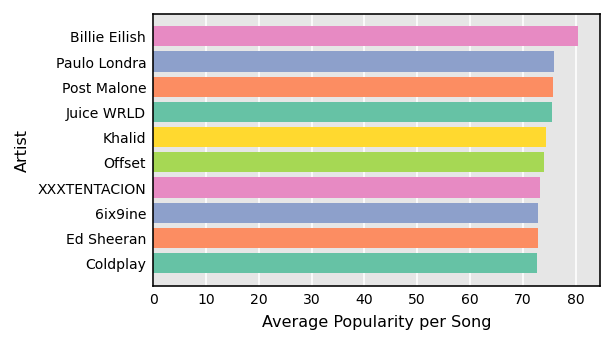

In [25]:
fig, ax = plt.subplots(figsize=(4, 2.5), dpi=144)
colors = plt.cm.Set2(range(6))

y = most_popular_artist_on_avg_plot["artist_name"].head(10)
width = most_popular_artist_on_avg_plot["avg_pop_per_song"].head(10)
ax.barh(y=y, width=width, color=colors)
ax.tick_params(labelsize=7, length=0)

ax.grid(True, axis='x', color='white')
ax.set_axisbelow(True)
ax.set_facecolor('.9')
ax.set_xlabel("Average Popularity per Song", size = 8)
ax.set_ylabel("Artist", size = 8)

plt.show()

### Most Common Duration

In [26]:
duration_m = tracks['duration_ms']/60000
tracks.insert(loc = 7, column= "duration_m", value= duration_m)

In [27]:
tracks.head(3)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_m,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,1.656217,99373,0.910,0.0,C#,0.346,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,2.289550,137373,0.737,0.0,F#,0.151,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,2.837783,170267,0.131,0.0,C,0.103,-13.879,Minor,0.0362,99.488,5/4,0.368


In [28]:
def duration(row):
    duration_m = row[7]
    if 0 < duration_m <=5: 
        return "0-5 Min"
    elif 5 < duration_m <=10: 
        return "5-10 Min"
    elif 10 < duration_m <=15: 
        return "10-15 Min"   
    else:
        return "15+ Min"
    
duration = tracks.apply(duration, axis = "columns")

In [29]:
tracks.insert(loc = 7, column= "duration", value= duration)

In [30]:
tracks.head(2)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration,duration_m,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,0-5 Min,1.656217,99373,0.910,0.0,C#,0.346,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,0-5 Min,2.289550,137373,0.737,0.0,F#,0.151,-5.559,Minor,0.0868,174.003,4/4,0.816


In [76]:
duration = tracks['duration'].value_counts().to_frame()
duration.rename({"duration": "count"}, axis = "columns", inplace = True)
duration

,count
0-5 Min,147592
5-10 Min,26871
10-15 Min,1446
15+ Min,605


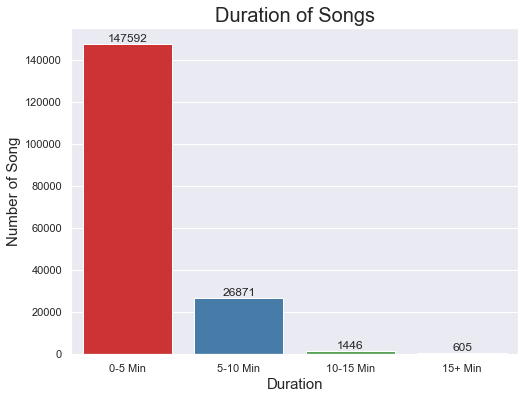

In [129]:
plt.figure(figsize=(8, 6))

plots = sns.barplot(x=duration.index, y="count", data=duration, palette = "Set1")
plt.xlabel("Duration", size = 15)
plt.ylabel("Number of Song", size = 15)
plt.title("Duration of Songs", size = 20)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), ha='center', va='center',
        size=12, xytext=(0, 5),
        textcoords='offset points')
    
plt.show()

### Number of song per genre

In [34]:
tracks["genre"].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [35]:
tracks_per_genre = tracks.groupby('genre')["track_name"].agg(len).to_frame()
tracks_per_genre.sort_values("track_name", ascending = False, inplace = True)
tracks_per_genre.rename(columns = {"track_name" : "no_of_track"}, inplace= True)
tracks_per_genre.head()

,no_of_track
genre,
Comedy,9674
Electronic,9150
Alternative,9098
Anime,8935
Classical,8703


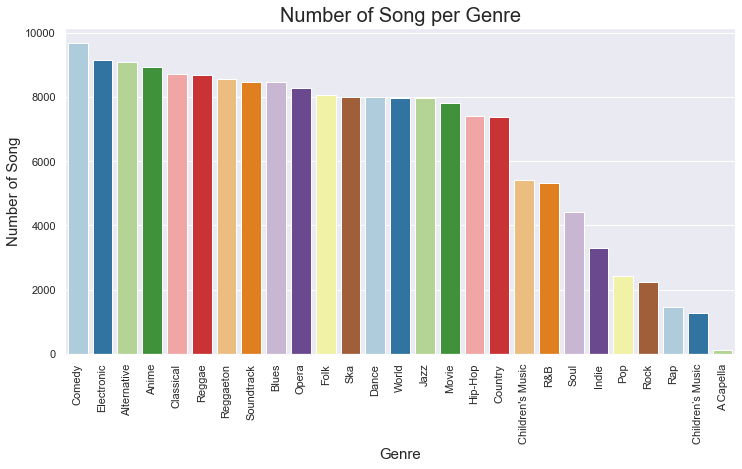

In [126]:
plt.figure(figsize=(12, 6))

plots = sns.barplot(x=tracks_per_genre.index, y="no_of_track", data=tracks_per_genre, palette = "Paired")
plt.xlabel("Genre", size = 15)
plt.ylabel("Number of Song", size = 15)
plt.xticks(rotation = 90)
plt.title("Number of Song per Genre", size = 20)

plt.show()

### Correlation heatmap

In [37]:
tracks_for_corr = tracks[['popularity', 'duration_m', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence']]
tracks_for_corr = tracks_for_corr.rename(columns= {"duration_m" : "duration in min"})
tracks_corr = tracks_for_corr.corr()

In [38]:
tracks_corr

,popularity,duration in min,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,0.019495,-0.360135,0.222389,0.234832,-0.147710,-0.161468,0.321909,-0.162004,0.083273,0.049098
duration in min,0.019495,1.000000,0.010344,-0.124303,-0.029942,0.069401,0.023721,-0.042834,-0.011592,-0.030067,-0.146919
acousticness,-0.360135,0.010344,1.000000,-0.379294,-0.729846,0.305704,0.079255,-0.693343,0.173081,-0.261013,-0.348968
danceability,0.222389,-0.124303,-0.379294,1.000000,0.365248,-0.371128,-0.026929,0.460690,0.133068,0.046894,0.587775
energy,0.234832,-0.029942,-0.729846,0.365248,1.000000,-0.392375,0.210203,0.824673,0.162323,0.241545,0.449535
instrumentalness,-0.147710,0.069401,0.305704,-0.371128,-0.392375,1.000000,-0.162877,-0.501543,-0.191822,-0.109592,-0.331535
liveness,-0.161468,0.023721,0.079255,-0.026929,0.210203,-0.162877,1.000000,0.057729,0.555551,-0.062172,0.005688
loudness,0.321909,-0.042834,-0.693343,0.460690,0.824673,-0.501543,0.057729,1.000000,0.000755,0.246446,0.427036
speechiness,-0.162004,-0.011592,0.173081,0.133068,0.162323,-0.191822,0.555551,0.000755,1.000000,-0.101701,0.018707
tempo,0.083273,-0.030067,-0.261013,0.046894,0.241545,-0.109592,-0.062172,0.246446,-0.101701,1.000000,0.159027


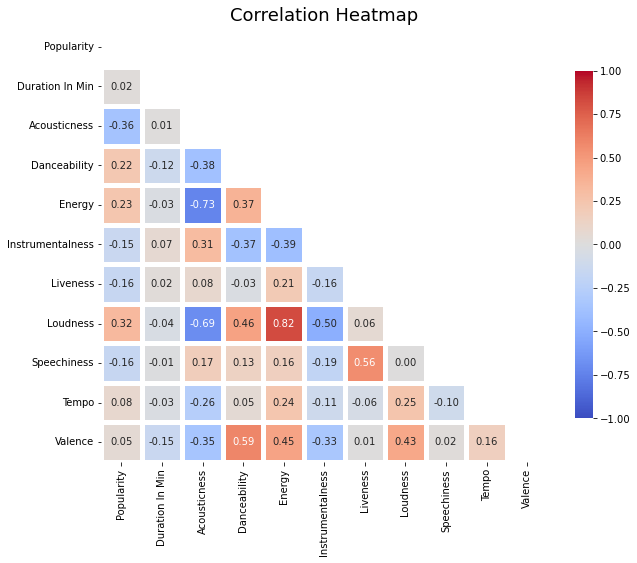

In [39]:
fig, ax = plt.subplots(figsize=(10, 8))

mask = np.triu(np.ones_like(tracks_corr, dtype = bool))

cmap = sns.color_palette("coolwarm", as_cmap=True)

sns.heatmap(data = tracks_corr, mask = mask, annot=True, fmt=".2f", cmap=cmap, linewidths=5,
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})

yticks = [i.title() for i in tracks_corr.index]
xticks = [i.title() for i in tracks_corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
plt.title("Correlation Heatmap", fontsize=18)
plt.show()

###  What makes a song popular?

In [40]:
tracks_corr.head(2)

,popularity,duration in min,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,0.019495,-0.360135,0.222389,0.234832,-0.147710,-0.161468,0.321909,-0.162004,0.083273,0.049098
duration in min,0.019495,1.000000,0.010344,-0.124303,-0.029942,0.069401,0.023721,-0.042834,-0.011592,-0.030067,-0.146919


In [41]:
pop_corr = tracks_corr["popularity"].to_frame().drop("popularity")

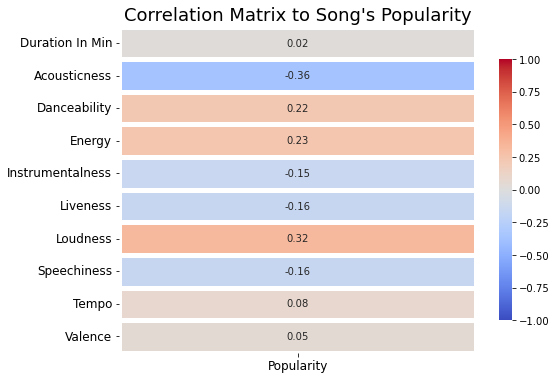

In [42]:
fig, ax = plt.subplots(figsize=(8,6))

cmap = sns.color_palette("coolwarm", as_cmap=True)

sns.heatmap(data = pop_corr, annot=True, fmt=".2f", cmap=cmap, linewidths=5,
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
yticks = [i.title() for i in pop_corr.index]
xticks = [i.title() for i in pop_corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
plt.title("Correlation Matrix to Song's Popularity", fontsize=18)
plt.tick_params(labelsize=12)
plt.show()